In [15]:
import io
import boto3
import pandas as pd
import pyarrow.parquet as pq

s3 = boto3.resource('s3')

file_name = []
my_bucket = s3.Bucket('iotproj-sensordata')
for file in my_bucket.objects.all():
    if("iotproj_firehose" in file.key):
        file_name.append(str(file.key))

dfs = []
for df_gen in range(len(file_name)):
    df_name = 'df_'+str(df_gen)
    dfs.append(df_name)

frames= []
fileno = -1
for i in file_name:
    #print(i)
    global fileno
    fileno = fileno + 1
    buffer = io.BytesIO()
    s3_object = s3.Object('iotproj-sensordata',i)
    s3_object.download_fileobj(buffer)
    table = pq.read_table(buffer)
    dfs[fileno] = table.to_pandas()
    dfs[fileno].drop('date', axis=1, inplace=True)

data = pd.concat(dfs)
data.head(5)

,gsr,bpm,mood,time
0,1712.328767,86.580087,Happy,13:59:22
1,1712.328767,86.256469,Happy,13:59:22
2,1709.401709,84.841629,Happy,13:59:24
3,1712.328767,85.702043,Happy,13:59:23
4,1706.484642,84.281500,Happy,13:59:25


<AxesSubplot:xlabel='gsr', ylabel='bpm'>

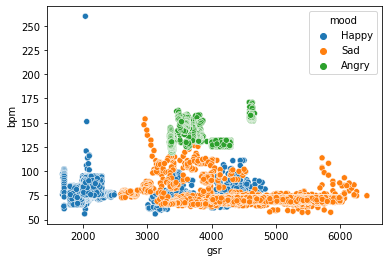

In [8]:
import seaborn as sns
sns.scatterplot(data=data, x="gsr", y="bpm", hue="mood")

Text(0.5, 1.0, 'Emotion distribution')

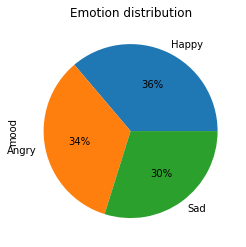

In [76]:
data['mood'].value_counts().plot.pie(autopct='%1.0f%%').set_title('Emotion distribution')

In [13]:
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

transform = preprocessing.LabelEncoder()
data['encoder_output'] = transform.fit_transform(data['mood'])
data = shuffle(data)

%store data

Stored 'data' (DataFrame)
